In [1]:
from pyFrame import Frame, Beam
import ipywidgets as widgets
import copy

In [2]:
BedFrame = Frame.Frame()

### Define Materials

In [3]:
#C24 Norm for German Construction wood in mm
E = 11000
G = 690
KVH = Beam.Material(E,G)
KVH.tensile_yield_strength = 14
KVH.compressive_yield_strength = 21
KVH.flexural_yield_strength = 24
KVH.shear_strength = 4

### Define Crosssections

In [4]:
def rect_crosssection(width, height):
    return Beam.Crosssection([(0,0),(0,height),(width,height),(width,0)])

In [5]:
T60100 = rect_crosssection(60,100)
T60120 = rect_crosssection(60,120)
T80100 = rect_crosssection(80,100)
T80140 = rect_crosssection(80,140)
T100100 = rect_crosssection(100,100)

T10060 = rect_crosssection(100, 60)
T12060 = rect_crosssection(120, 60)
T10080 = rect_crosssection(100, 80)
T14080 = rect_crosssection(140, 80)


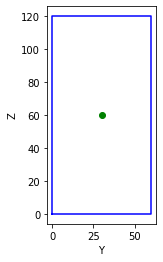

In [6]:
T60120.plot()

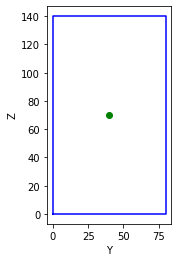

In [7]:
T80140.plot()

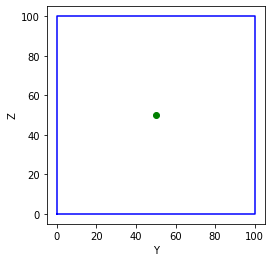

In [8]:
T100100.plot()

## Create Base Frame

### Define Nodes

In [9]:
#addding nodes to Frame
xDim = 2200
yDim = 2600
zDim = 3000

BedFrame.addNode('G1',   0,0,0)
BedFrame.addNode('G2',xDim,0,0)
BedFrame.addNode('G3',   0,yDim,0)
BedFrame.addNode('G4',xDim,yDim,0)

BedFrame.addNode('G5',   0,1000,0)

BedFrame.addNode('T1',   0,1000,zDim)
BedFrame.addNode('T2',xDim,1000,zDim)
BedFrame.addNode('T3',   0,yDim,zDim)
BedFrame.addNode('T4',xDim,yDim,zDim)


BedFrame.addNode('P1',   0,0,zDim - 1000)
BedFrame.addNode('P2',xDim,0,zDim - 1000)
BedFrame.addNode('P3',   0,1000,zDim - 1000)
BedFrame.addNode('P4',xDim,1000,zDim - 1000)


### Add Members

In [10]:
#add Members 
BedFrame.addMember('col1', 'G1','P1', KVH, T14080)
BedFrame.addMember('col2', 'G2','P2', KVH, T14080)
BedFrame.addMember('col3', 'G3','T3', KVH, T14080)
BedFrame.addMember('col4', 'G4','T4', KVH, T14080)

BedFrame.addMember('col5', 'G5','P3', KVH, T14080)


BedFrame.addMember('TopBeam1', 'T1','T2', KVH, T60100)
BedFrame.addMember('TopBeam2', 'T3','T4', KVH, T60100)
BedFrame.addMember('TopBeam3', 'T1','T3', KVH, T80140)
BedFrame.addMember('TopBeam4', 'T2','T4', KVH, T80140)

BedFrame.addMember('PlattFormBeam1', 'P1','P2', KVH, T60100)
BedFrame.addMember('PlattFormBeam2', 'P3','P4', KVH, T60100)
BedFrame.addMember('PlattFormBeam3', 'P1','P3', KVH, T60120)
BedFrame.addMember('PlattFormBeam4', 'P2','P4', KVH, T60120)

BedFrame.addMember('Diagonal2', 'P4','T2', KVH, T60120)
BedFrame.addMember('Diagonal1', 'P3','T1', KVH, T60120)
BedFrame.addMember('Diagonal3', 'P1','T1', KVH, T60100)
BedFrame.addMember('Diagonal4', 'P2','T2', KVH, T60100)



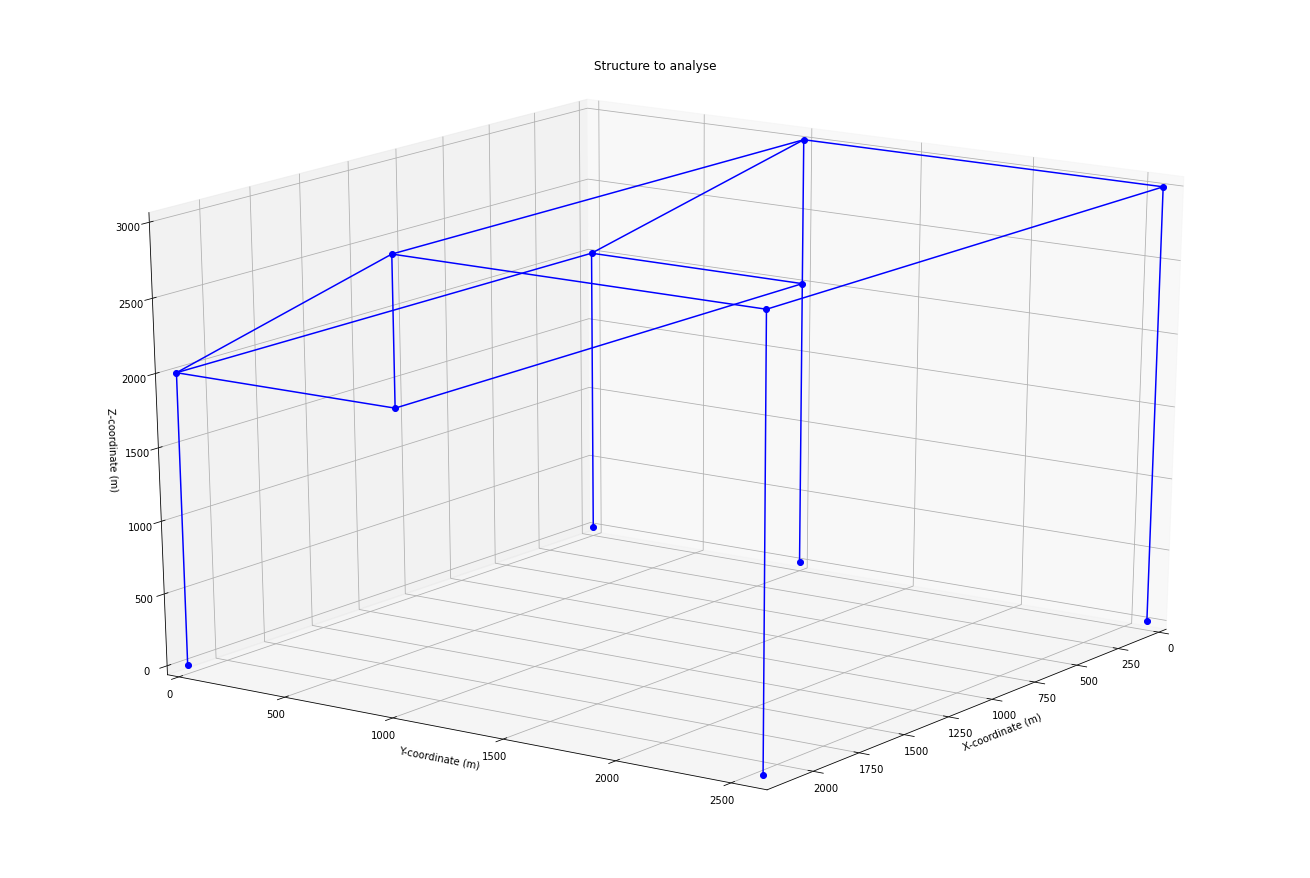

In [11]:
BedFrame.plot(deformed=False, showMemberName= False, showNodeName = False)

In [12]:
#create supports 
BedFrame.makeSupport('G1', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G2', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G3', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G4', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G5', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)

In [13]:

#BedFrame.addNodeLoad('5', Fy=lol*1000,Fx=lol*1000)

In [14]:
#set member loads
BedLoad = 10000

x1 = 100
x2 = 1500

a = abs(BedFrame.Nodes['T2'].x- BedFrame.Nodes['T3'].x)
b = abs(BedFrame.Nodes['T2'].y- BedFrame.Nodes['T3'].y)


BedFrame.addMemberPtForce('TopBeam3', x=x1,Fz=-BedLoad/4)
BedFrame.addMemberPtForce('TopBeam3', x=x1,Fx = BedLoad/4)

BedFrame.addMemberPtForce('TopBeam3', x=x2,Fz=-BedLoad)
BedFrame.addMemberPtForce('TopBeam3', x=x2,Fy=-BedLoad/4)
BedFrame.addMemberPtForce('TopBeam3', x=x2,Fx=-BedLoad/4*a/((a**2+b**2)**(0.5)), Fy=-BedLoad/4*b/((a**2+b**2)**(0.5)))
BedFrame.addMemberPtForce('TopBeam3', x=x2,Fx=-BedLoad/4)


BedFrame.addMemberPtForce('TopBeam4', x=x1,Fz=-BedLoad/4)
BedFrame.addMemberPtForce('TopBeam4', x=x1,Fx=BedLoad/4*a/((a**2+b**2)**(0.5)), Fy=BedLoad/4*b/((a**2+b**2)**(0.5)))


BedFrame.addMemberPtForce('TopBeam4', x=x2,Fz=-BedLoad/4)
BedFrame.addMemberPtForce('TopBeam4', x=x2,Fy=BedLoad/4)

In [15]:
BedFrame.analyze()

array([[-8.26422437e-01, -8.26422437e-01, -8.26422437e-01, ...,
        -8.26422437e-01, -8.26422437e-01, -8.26422437e-01],
       [-2.91531099e+00, -2.91531099e+00, -2.91531099e+00, ...,
        -2.91531099e+00, -2.91531099e+00, -2.91531099e+00],
       [-4.24632957e-02, -4.24632957e-02, -4.24632957e-02, ...,
        -4.24632957e-02, -4.24632957e-02, -4.24632957e-02],
       ...,
       [-4.11073926e-03, -4.11073926e-03, -4.11073926e-03, ...,
        -4.11073926e-03, -4.11073926e-03, -4.11073926e-03],
       [ 1.20155212e-03,  1.20155212e-03,  1.20155212e-03, ...,
         1.20155212e-03,  1.20155212e-03,  1.20155212e-03],
       [ 2.40393067e-03,  2.40393067e-03,  2.40393067e-03, ...,
         2.40393067e-03,  2.40393067e-03,  2.40393067e-03]])

In [16]:
#BedFrame.plot()
widgets.interact(BedFrame.plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,50,1))

interactive(children=(FloatSlider(value=0.01, description='label_offset', max=0.1, min=0.01, step=0.01), Float…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

### Compute minimum Margin of Safeties

In [17]:
BedFrame.MoS()

Member TopBeam2 : AxialMoS 40.049 , ShearMoS 68.121 , FlexuralMoS 0.662
Member Diagonal2 : AxialMoS 476.95 , ShearMoS 51.739 , FlexuralMoS 1.022
Member TopBeam1 : AxialMoS 156.589 , ShearMoS 75.126 , FlexuralMoS 1.17
Member TopBeam3 : AxialMoS 55.49 , ShearMoS 13.806 , FlexuralMoS 1.481
Member col5 : AxialMoS 213.091 , ShearMoS 73.655 , FlexuralMoS 1.636
Member TopBeam4 : AxialMoS 184.319 , ShearMoS 14.103 , FlexuralMoS 1.655
Member Diagonal4 : AxialMoS 145.57 , ShearMoS 35.172 , FlexuralMoS 1.664
Member col4 : AxialMoS 55.4 , ShearMoS 50.144 , FlexuralMoS 1.733
Member col3 : AxialMoS 24.16 , ShearMoS 427.99 , FlexuralMoS 2.985
Member PlattFormBeam3 : AxialMoS 167.124 , ShearMoS 28.767 , FlexuralMoS 3.07
Member Diagonal3 : AxialMoS 72.199 , ShearMoS 194.975 , FlexuralMoS 4.264
Member PlattFormBeam2 : AxialMoS 471.588 , ShearMoS 206.809 , FlexuralMoS 4.439
Member PlattFormBeam4 : AxialMoS 201.515 , ShearMoS 87.238 , FlexuralMoS 6.445
Member Diagonal1 : AxialMoS 76.514 , ShearMoS 237.675

In [18]:
widgets.interact(BedFrame.Members['col4'].plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,20,1))

interactive(children=(FloatSlider(value=0.01, description='label_offset', max=0.1, min=0.01, step=0.01), Float…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# Due to Material Constraints Need to Reiterate

### At Bauhaus, I noticed that it is cheaper to buy the same kind of wood to get discounts. Also, they ran out of 80x140 beams thus I had buy 160x40 beams

In [33]:
BedFrame2 = Frame.Frame()

### New Beams

In [34]:
T80160 = rect_crosssection(80,160)
T16080 = rect_crosssection(160,80)

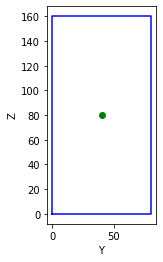

In [35]:
T80160.plot()

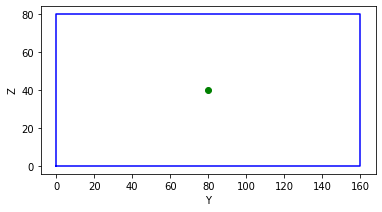

In [36]:
T16080.plot()

## Create Base Frame

### Define Nodes

In [37]:
#addding nodes to Frame
xDim = 2200
yDim = 2600
zDim = 3000

BedFrame2.addNode('G1',   0,0,0)
BedFrame2.addNode('G2',xDim,0,0)
BedFrame2.addNode('G3',   0,yDim,0)
BedFrame2.addNode('G4',xDim,yDim,0)

BedFrame2.addNode('G5',   0,1000,0)

BedFrame2.addNode('T1',   0,1000,zDim)
BedFrame2.addNode('T2',xDim,1000,zDim)
BedFrame2.addNode('T3',   0,yDim,zDim)
BedFrame2.addNode('T4',xDim,yDim,zDim)


BedFrame2.addNode('P1',   0,0,zDim - 1000)
BedFrame2.addNode('P1.1',   xDim/4,0,zDim - 1000)
BedFrame2.addNode('P1.2',   2*xDim/4,0,zDim - 1000)
BedFrame2.addNode('P1.3',   3*xDim/4,0,zDim - 1000)
BedFrame2.addNode('P2',xDim,0,zDim - 1000)

BedFrame2.addNode('P3',   0,1000,zDim - 1000)
BedFrame2.addNode('P3.1',   xDim/4,1000,zDim - 1000)
BedFrame2.addNode('P3.2',   2*xDim/4,1000,zDim - 1000)
BedFrame2.addNode('P3.3',   3*xDim/4,1000,zDim - 1000)
BedFrame2.addNode('P4',xDim,1000,zDim - 1000)

BedFrame2.addNode('P5',   0,yDim,zDim - 1000)
BedFrame2.addNode('P6',xDim,yDim,zDim - 1000)

### Add Members

In [38]:
#add Members 
BedFrame2.addMember('col1', 'G1','P1', KVH, T16080)
BedFrame2.addMember('col2', 'G2','P2', KVH, T16080)
BedFrame2.addMember('col3A', 'G3','P5', KVH, T16080)
BedFrame2.addMember('col4A', 'G4','P6', KVH, T16080)

BedFrame2.addMember('col3B', 'P5', 'T3', KVH, T16080)
BedFrame2.addMember('col4B', 'P6', 'T4', KVH, T16080)

BedFrame2.addMember('col5', 'G5','P3', KVH, T16080)


BedFrame2.addMember('TopBeam1', 'T1','T2', KVH, T80160)
BedFrame2.addMember('TopBeam2', 'T3','T4', KVH, T80160)
BedFrame2.addMember('TopBeam3', 'T1','T3', KVH, T80160)
BedFrame2.addMember('TopBeam4', 'T2','T4', KVH, T80160)

BedFrame2.addMember('PlattFormBeam1.1', 'P1','P1.1', KVH, T80160)
BedFrame2.addMember('PlattFormBeam1.2', 'P1.1','P1.2', KVH, T80160)
BedFrame2.addMember('PlattFormBeam1.3', 'P1.2','P1.3', KVH, T80160)
BedFrame2.addMember('PlattFormBeam1.4', 'P1.3','P2', KVH, T80160)

BedFrame2.addMember('PlattFormBeam2.1', 'P3','P3.1', KVH, T80160)
BedFrame2.addMember('PlattFormBeam2.2', 'P3.1','P3.2', KVH, T80160)
BedFrame2.addMember('PlattFormBeam2.3', 'P3.2','P3.3', KVH, T80160)
BedFrame2.addMember('PlattFormBeam2.4', 'P3.3','P4', KVH, T80160)

BedFrame2.addMember('PlattFormBeam3', 'P1','P3', KVH, T80160)
BedFrame2.addMember('PlattFormBeam4', 'P2','P4', KVH, T80160)

BedFrame2.addMember('PlattFormBeam5.1', 'P1.1','P3.1', KVH, T80160)
BedFrame2.addMember('PlattFormBeam5.2', 'P1.2','P3.2', KVH, T80160)
BedFrame2.addMember('PlattFormBeam5.3', 'P1.3','P3.3', KVH, T80160)

BedFrame2.addMember('PlattFormBeam6', 'P5','P6', KVH, T80160)


BedFrame2.addMember('Diagonal2', 'P4','T2', KVH, T80160)
BedFrame2.addMember('Diagonal1', 'P3','T1', KVH, T80160)
BedFrame2.addMember('Diagonal3', 'P1','T1', KVH, T80160)
BedFrame2.addMember('Diagonal4', 'P2','T2', KVH, T80160)



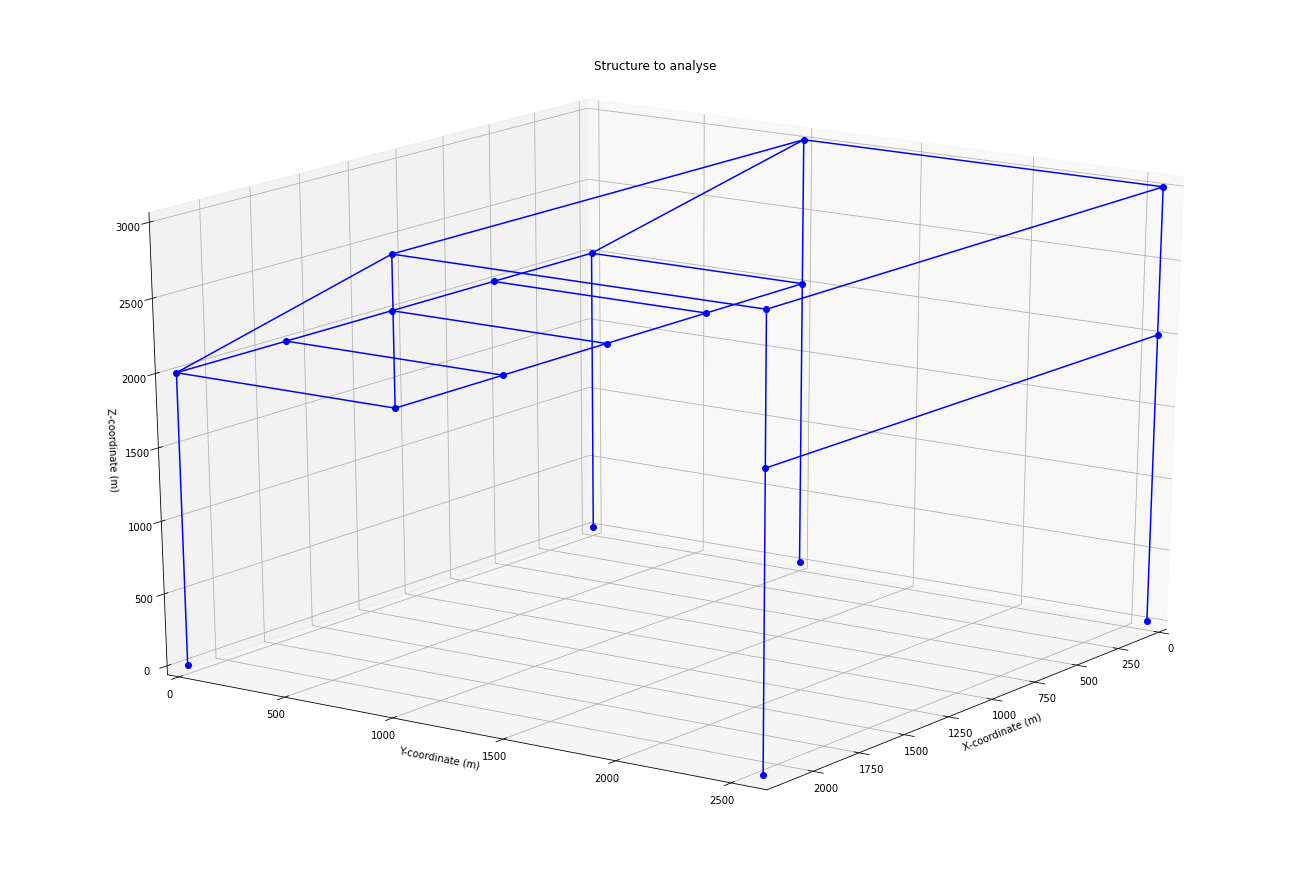

In [39]:
BedFrame2.plot(deformed=False, showMemberName= False, showNodeName = False)

In [40]:
#create supports 
BedFrame2.makeSupport('G1', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame2.makeSupport('G2', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame2.makeSupport('G3', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame2.makeSupport('G4', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame2.makeSupport('G5', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)

In [41]:
#set member loads
BedLoad = 10000

x1 = 100
x2 = 1500

a = abs(BedFrame2.Nodes['T2'].x- BedFrame2.Nodes['T3'].x)
b = abs(BedFrame2.Nodes['T2'].y- BedFrame2.Nodes['T3'].y)


BedFrame2.addMemberPtForce('TopBeam3', x=x1,Fz=-BedLoad/4)
BedFrame2.addMemberPtForce('TopBeam3', x=x1,Fx = BedLoad/4)

BedFrame2.addMemberPtForce('TopBeam3', x=x2,Fz=-BedLoad)
BedFrame2.addMemberPtForce('TopBeam3', x=x2,Fy=-BedLoad/4)
BedFrame2.addMemberPtForce('TopBeam3', x=x2,Fx=-BedLoad/4*a/((a**2+b**2)**(0.5)), Fy=-BedLoad/4*b/((a**2+b**2)**(0.5)))
BedFrame2.addMemberPtForce('TopBeam3', x=x2,Fx=-BedLoad/4)


BedFrame2.addMemberPtForce('TopBeam4', x=x1,Fz=-BedLoad/4)
BedFrame2.addMemberPtForce('TopBeam4', x=x1,Fx=BedLoad/4*a/((a**2+b**2)**(0.5)), Fy=BedLoad/4*b/((a**2+b**2)**(0.5)))


BedFrame2.addMemberPtForce('TopBeam4', x=x2,Fz=-BedLoad/4)
BedFrame2.addMemberPtForce('TopBeam4', x=x2,Fy=BedLoad/4)

In [42]:
U = BedFrame2.analyze()

In [43]:
#BedFrame.plot()
widgets.interact(BedFrame2.plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,200,10))

interactive(children=(FloatSlider(value=0.01, description='label_offset', max=0.1, min=0.01, step=0.01), Float…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

### Compute minimum Margin of Safeties

In [44]:
BedFrame2.MoS()

Member TopBeam3 : AxialMoS 64.382 , ShearMoS 15.213 , FlexuralMoS 1.602
Member col5 : AxialMoS 170.2 , ShearMoS 91.304 , FlexuralMoS 1.831
Member TopBeam4 : AxialMoS 226.881 , ShearMoS 16.005 , FlexuralMoS 1.99
Member TopBeam2 : AxialMoS 86.515 , ShearMoS 133.774 , FlexuralMoS 2.886
Member TopBeam1 : AxialMoS 331.616 , ShearMoS 150.785 , FlexuralMoS 3.837
Member Diagonal2 : AxialMoS 618.835 , ShearMoS 100.919 , FlexuralMoS 4.418
Member col4A : AxialMoS 63.689 , ShearMoS 68.982 , FlexuralMoS 6.523
Member col4B : AxialMoS 65.08 , ShearMoS 65.488 , FlexuralMoS 7.657
Member col3A : AxialMoS 28.19 , ShearMoS 745.036 , FlexuralMoS 8.133
Member col1 : AxialMoS 153.794 , ShearMoS 90.359 , FlexuralMoS 8.574
Member Diagonal4 : AxialMoS 317.461 , ShearMoS 60.9 , FlexuralMoS 8.916
Member Diagonal3 : AxialMoS 188.302 , ShearMoS 239.706 , FlexuralMoS 8.944
Member PlattFormBeam3 : AxialMoS 329.179 , ShearMoS 52.211 , FlexuralMoS 9.764
Member Diagonal1 : AxialMoS 111.472 , ShearMoS 371.148 , FlexuralM

## Evaluation
With the new wood, we notice that our minimum MoS is much larger then the original Frame.
If we play with the Loads, we find that the Frame Fails at about 26 kN !!
Thus, we expect this frame to carry 10 kN with a MoS of 1.6 at the TopBeam3 